# Section 3: Data exploration and visualization - Practice exercises


##### Luis Gutierrez (2020) and Mary Richardson (2019)

This notebook contains several problems for you to practice your Pandas and data visualization skills. Type your answers in the code cells as indicated by `# TODO:...`. Reference the section notes for help. This isn't an assignment, so there's no need to submit it. It's purely a chance for you to practice!

In [6]:
import numpy as np                # So we can do useful things with arrays
import pandas as pd               # So we can store our *tidy* data
import matplotlib.pyplot as plt   # So we can plot all the things
import seaborn as sns             # So we can make even prettier plots of all the things

# So that matplotlib plots are shown in the Jupyter notebook
%matplotlib inline

### 1. Melt Jakob's vegetable consumption data

Melt Jakob's data so we have just three columns (vegetable, age, and consumption). In order to do this, we must keep vegetable as the ID variable, and make `4y`, `8y`, `12y`, `16y`, `20y`, and `24y` values in the new column. 

In [9]:
#TODO: read in the data
cols = !head -n1 jakobs_veggie_consumption.tsv
cols = cols[0].strip('#').split('\t')

df_jakob = pd.read_table('jakobs_veggie_consumption.tsv', # File path
                            sep='\t', # Whether it is whitespace delimited
                            comment='#', # Number of rows to skip
                            header = None, # Row that has the header (None since we are going to provide it ourselves)
                            names = cols, # Column names
                            index_col=0 # Set the row names using the first column
                           )
df_jakob

4y   8y  12y  16y  20y  24y
Vegetable                                             
Acorn squash              755   26   28   72   39   75
Artichoke                  14   87  525   54   56   31
Avocados                   51  968   55   29   10  838
Beets                      45   23  827  890   69   90
Black beans               965   25   47   49   74   83
...                       ...  ...  ...  ...  ...  ...
Tomatoes, grape & cherry  507   76  552   40   32   24
Tomatoes, large round     825   58   35   85   95   26
Tomatoes, roma & plum      30   63  692   68   38   53
Turnip greens             908   29   56   64   92   81
Zucchini                   18   79  512   79   86   42

[63 rows x 6 columns]

In [11]:
# TODO: If vegetables are the indices of the DataFrame, you should use df.reset_index() to make gene_names a column of 
#       values before melting
df_jakob=df_jakob.reset_index()
df_jakob

Vegetable   4y   8y  12y  16y  20y  24y
0               Acorn squash  755   26   28   72   39   75
1                  Artichoke   14   87  525   54   56   31
2                   Avocados   51  968   55   29   10  838
3                      Beets   45   23  827  890   69   90
4                Black beans  965   25   47   49   74   83
..                       ...  ...  ...  ...  ...  ...  ...
58  Tomatoes, grape & cherry  507   76  552   40   32   24
59     Tomatoes, large round  825   58   35   85   95   26
60     Tomatoes, roma & plum   30   63  692   68   38   53
61             Turnip greens  908   29   56   64   92   81
62                  Zucchini   18   79  512   79   86   42

[63 rows x 7 columns]

In [13]:
# TODO: Use pd.melt() to obtain a DataFrame as the one shown in the figure above

# Melt the dataframe, so that each row only has one value
df_tidy = df_jakob.melt(id_vars=['Vegetable'], # List the column names that will remain as columns
                  value_vars=['4y','8y','12y','16y','20y','24y'], # List the column names that we want to assign to values instead
                  var_name='Age', value_name='Consumption' # Set the names for the new columns
                 ) 
df_tidy

Vegetable  Age  Consumption
0                Acorn squash   4y          755
1                   Artichoke   4y           14
2                    Avocados   4y           51
3                       Beets   4y           45
4                 Black beans   4y          965
..                        ...  ...          ...
373  Tomatoes, grape & cherry  24y           24
374     Tomatoes, large round  24y           26
375     Tomatoes, roma & plum  24y           53
376             Turnip greens  24y           81
377                  Zucchini  24y           42

[378 rows x 3 columns]

### 2. Plot

Seaborn has several useful functions that we can apply to visualize our data. First, show a plot of vegetables consumed for each year. Use any line or scatter function you want. Play around with multiple options. Read the documentation of this function and look at examples on the seaborn website if you need help.

Text(0, 0.5, 'Vegetables Consumed')

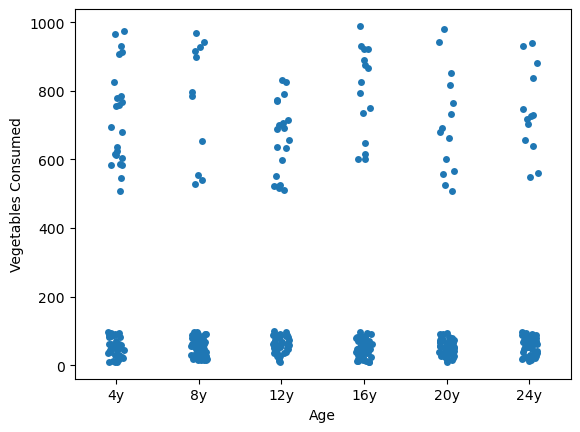

In [17]:
#TODO: Plot the data
sns.stripplot(x='Age', y='Consumption', data=df_tidy)
plt.ylabel('Vegetables Consumed')

Now make the same plot using only matplotlib: 

Text(0, 0.5, 'Quantity')

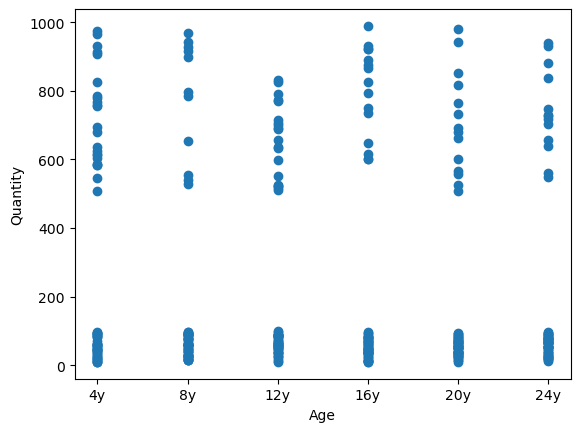

In [20]:
#TODO: repeat in matplotlib 
plt.scatter(list(df_tidy['Age']),list(df_tidy['Consumption']))
plt.xlabel('Age')
plt.ylabel('Quantity')


### 4. Add labels and melt

**This is a challenging exercise**. Add the wt and mut labels that were initially in the header of the `section-data.tbl` file to this new tidy DataFrame. You should have a column in the end that has the wt or mut designation. The header of your melted DataFrame should look like this in the end

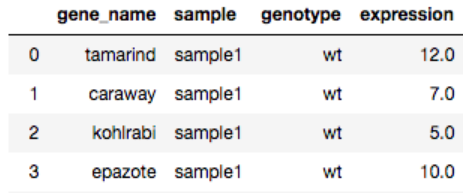

*Hint:* Look at the last 3 examples of the `pd.melt()` [documentation](https://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.melt.html). In these examples MultiIndexed columns are used.

In [23]:
# TODO: Read file using pd.read_table()
df = pd.read_table('section-data.tbl', 
                   sep=r'\s+', # Set the delimiter to whitespace
                   index_col=0, # Set the row names using the 1st column
                   comment='#', # Skip all the comment lines
                   names=['gene_name','sample1','sample2','sample3','sample4'])
df

sample1  sample2  sample3  sample4
gene_name                                    
tamarind      12.0     16.0      4.0      8.0
caraway        7.0     12.0     14.0     28.0
kohlrabi       5.0     25.0     20.0     10.0
ginger         NaN      9.0     16.0     17.0
epazote       10.0     12.0      3.0      6.0
valerian      27.0     25.0      NaN     19.0

In [25]:
# TODO: Remove NaNs
df = df.dropna()
df

sample1  sample2  sample3  sample4
gene_name                                    
tamarind      12.0     16.0      4.0      8.0
caraway        7.0     12.0     14.0     28.0
kohlrabi       5.0     25.0     20.0     10.0
epazote       10.0     12.0      3.0      6.0

In [27]:
# TODO: Preview the data header to know how to name the columns
!head section-data.tbl

# Section Pretend Data
# MCB112 2019
#
#              wt        wt        mut       mut             
# gene_name    sample1   sample2   sample3   sample4
tamarind       12.0      16.0      4.0       8.0
caraway        7.0       12.0      14.0      28.0
kohlrabi       5.0       25.0      20.0      10.0
ginger         NaN       9.0       16.0      17.0
epazote        10.0      12.0      3.0       6.0


In [29]:
# TODO: If the gene names are used are indices, they should be converted into a column of values using df.reset_index()
df = df.reset_index()
# TODO: Specify the column names as a list of lists (i.e. MultiIndexed). Look at the pandas documentation!
df.columns = [['gene_name','sample1','sample2','sample3','sample4'], ['gene_name','wt','wt','mut','mut']]
df

gene_name sample1 sample2 sample3 sample4
  gene_name      wt      wt     mut     mut
0  tamarind    12.0    16.0     4.0     8.0
1   caraway     7.0    12.0    14.0    28.0
2  kohlrabi     5.0    25.0    20.0    10.0
3   epazote    10.0    12.0     3.0     6.0

In [31]:
# TODO: Melt the DataFrame
df_tidy = df.melt(id_vars=[('gene_name','gene_name')], # List the column names that will remain as columns
                  value_vars=[('sample1','wt'),('sample2','wt'),('sample3','mut'),('sample4','mut')], # List the column names that we actually want to assign to values instead
                   value_name='expression' # Set the names for the new columns
                 ) 
# the var_name parameter throws an error if we pass two arguments 
#so we have to manually rename the columns
# TODO: Rename the columns
df_tidy.columns = ['gene_name', 'sample', 'genotype', 'expression'] #Rename columns
df_tidy

gene_name   sample genotype  expression
0   tamarind  sample1       wt        12.0
1    caraway  sample1       wt         7.0
2   kohlrabi  sample1       wt         5.0
3    epazote  sample1       wt        10.0
4   tamarind  sample2       wt        16.0
5    caraway  sample2       wt        12.0
6   kohlrabi  sample2       wt        25.0
7    epazote  sample2       wt        12.0
8   tamarind  sample3      mut         4.0
9    caraway  sample3      mut        14.0
10  kohlrabi  sample3      mut        20.0
11   epazote  sample3      mut         3.0
12  tamarind  sample4      mut         8.0
13   caraway  sample4      mut        28.0
14  kohlrabi  sample4      mut        10.0
15   epazote  sample4      mut         6.0

### 4. Plot (2)

Apart from allowing us visualize our final results. Plotting is a very useful tool to validate that intermediate steps are working as expected. As a small example of this (and as a way to introduce other plotting functions), we will plot a histogram to verify that the method `df.sample(n)`, which returns a sample of `n` rows from a DataFrame, is actually sampling the DataFrame uniformly.

Of course `df.sample()` has been built exactly for that, so the result should not be surprising. However, you can imagine (and you're encouraged to try) doing the same with the reservoir sampling algorithm you developed on the problem set.

Let's use the first 100 rows from Jakob's dataset

In [34]:
# TODO: Create a new DataFrame with the first 100 rows of Jakob's DataFrame.
df_to_sample = df_jakob.iloc[:100]
df_to_sample

Vegetable   4y   8y  12y  16y  20y  24y
0               Acorn squash  755   26   28   72   39   75
1                  Artichoke   14   87  525   54   56   31
2                   Avocados   51  968   55   29   10  838
3                      Beets   45   23  827  890   69   90
4                Black beans  965   25   47   49   74   83
..                       ...  ...  ...  ...  ...  ...  ...
58  Tomatoes, grape & cherry  507   76  552   40   32   24
59     Tomatoes, large round  825   58   35   85   95   26
60     Tomatoes, roma & plum   30   63  692   68   38   53
61             Turnip greens  908   29   56   64   92   81
62                  Zucchini   18   79  512   79   86   42

[63 rows x 7 columns]

In [36]:
# TODO: Make the row indices be numbers instead of gene_names() by using reset_index()
#if you did this already above, don't do it again

In [38]:
# TODO: Run df.sample(n = 1) N = 100000 times. Sample a *single row* each time df.sample() is called
#       Store the indices of the rows that are being sampled each into a list or numpy array.
#       You should end up with a list of N = 100000 elements. 


In [40]:
# TODO Plot a histogram of the list of indices using the plt.hist() function. Read its documentation if you need it.


You should validate with the histogram that `df.sample()` samples rows uniformly.